<a href="https://colab.research.google.com/github/Vadimius1010/KayumovVR_69/blob/master/MTS_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика - Домашнее задание 5

Провести следующие эксперименты:

1. Для выбранного распределения сгенерируйте выборки разного объема и проиллюстрируйте сходимость выборочного среднего к математическому ожиданию (покажите наглядно стабилизацию выборочного среднего).
2. Наглядно продемонстрируйте центральную предельную теорему в действии для выбранного вами распределения (покажите сходимость с ростом выборки к нормальному распределению).

Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте:
* асимптотический доверительный интервал для среднего значения на базе ЦПТ
* точный доверительный интервал для среднего значения
* эфронов доверительный интервал для среднего, медианы, моды, дисперсии.

Представьте по пунктам **3-5 сводный датафрейм в читабельном формате и предоставьте вывод о ширинах ДИ**, есть ли соответствие фактическому распределению, откуда взята выборка.

## Распределение Лапласа
Распределение Лапласа - это непрерывное распределение случайной величины, при котором плотность вероятности есть:
4262cfd0ad0126e2db935010703f1930e505910a.svg

где α > 0 - параметр масштаба, -∞ < β < +∞ - параметр сдвига

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


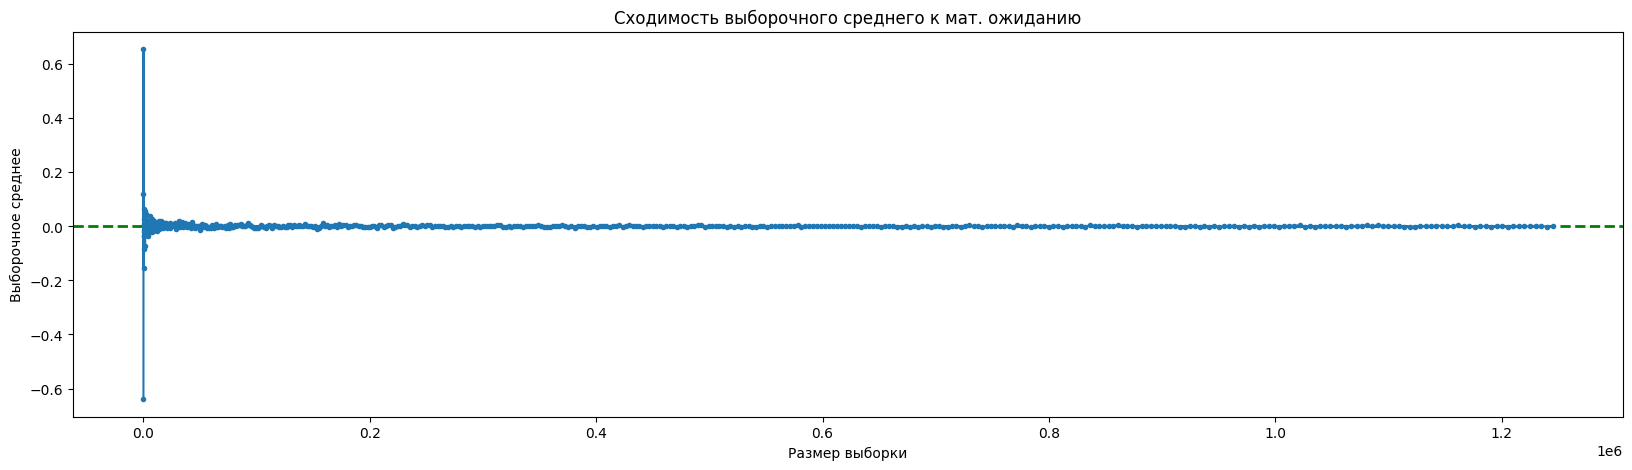

In [ ]:
# Задание 1
sample_sizes = []
for i in range(500):
    sample_sizes.append(5*i**2)

means = []
# Найдем средние каждой выборки
for n in sample_sizes:
    current_sample = stats.laplace.rvs(size=n) # Создаем выборку (random variates)
    means.append(np.mean(current_sample)) # Считаем выборочное среднее

# Убедимся в сходимости выборочного среднего к матожиданию
plt.figure(figsize=(20,5))
plt.axhline(stats.laplace.expect(), color="green", linestyle='dashed', lw=2) # Теор. матожидание
plt.title('Сходимость выборочного среднего к мат. ожиданию')
plt.plot(sample_sizes, means, marker='.')
plt.xlabel('Размер выборки')
plt.ylabel('Выборочное среднее')
plt.show()


Видим, что выборочное среднее стабилизируется с увеличением размера выборки

In [ ]:
# Задание 2
def generate_pdf(sample_base, n):
    # Сгенерируем выборочные средние
    means = []
    for _ in range(n):
        sample = np.random.choice(sample_base, size=25, replace=False)
        sample_mean = np.mean(sample)
        means.append(sample_mean)

    # Построим график плотности выборочных средних

    sns.histplot(np.array(means), kde=True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()
    print(stats.laplace.expect(), np.mean(means))

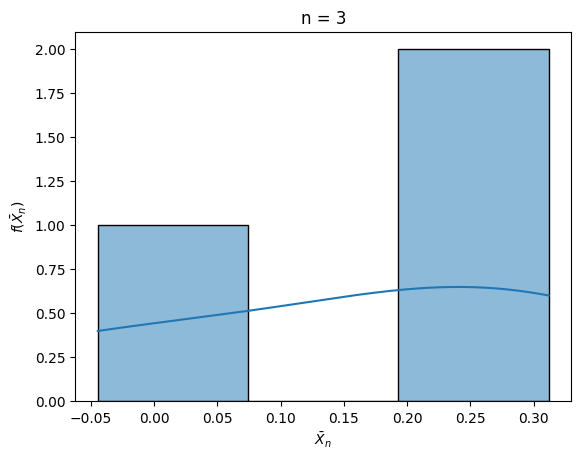

-2.7755575615628914e-17 0.16326216056641116


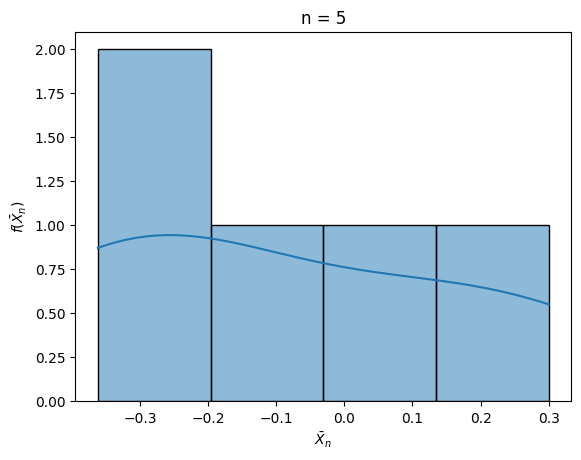

-2.7755575615628914e-17 -0.09317619422634975


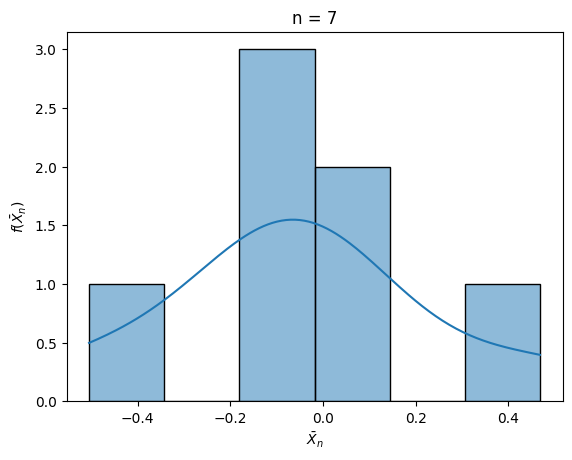

-2.7755575615628914e-17 -0.047702059120222136


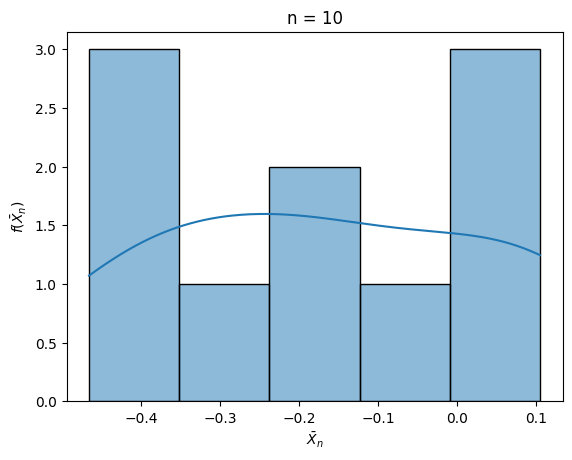

-2.7755575615628914e-17 -0.16186202281486486


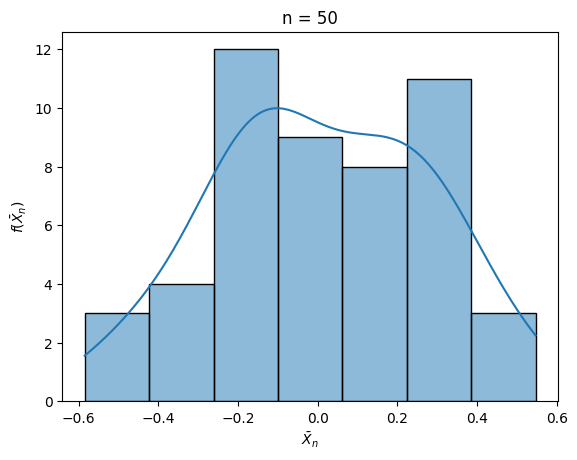

-2.7755575615628914e-17 0.009677995293944976


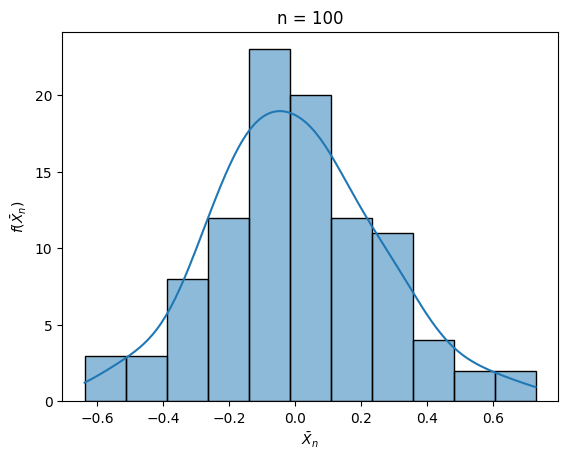

-2.7755575615628914e-17 -0.00010719615170821525


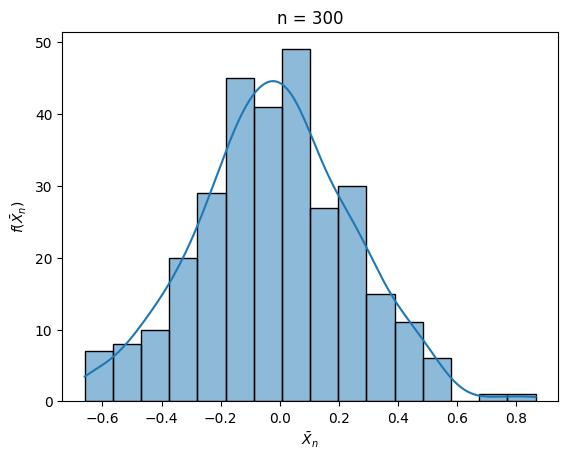

-2.7755575615628914e-17 -0.017402798742411175


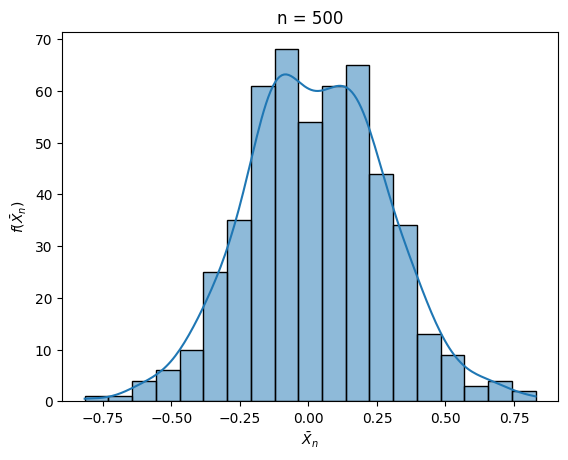

-2.7755575615628914e-17 0.028202689642996406


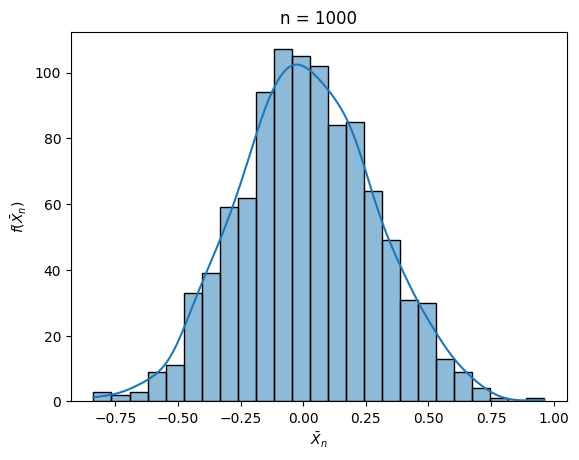

-2.7755575615628914e-17 0.013656450794693815


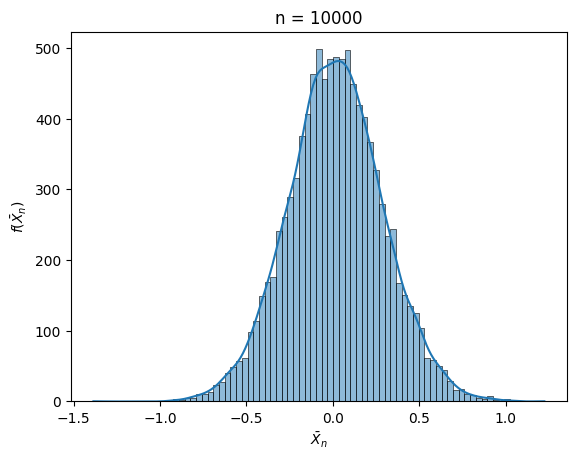

-2.7755575615628914e-17 0.01648850722259054


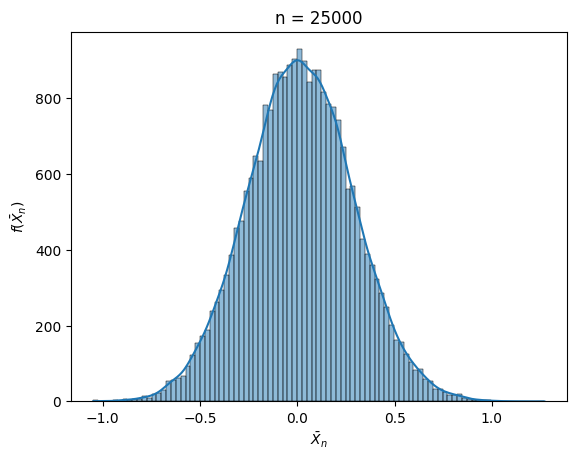

-2.7755575615628914e-17 0.016603166379979002


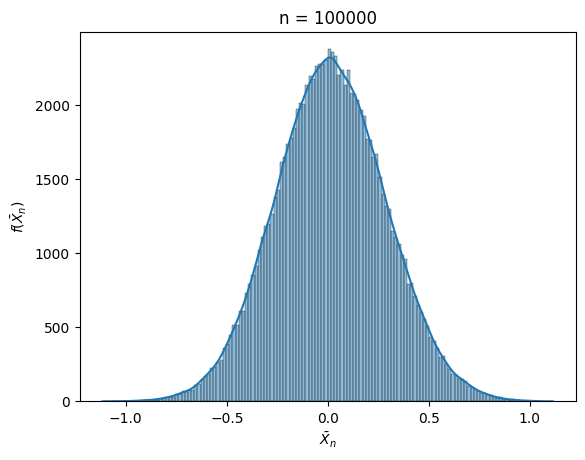

-2.7755575615628914e-17 0.014862292299225992


In [ ]:
# Создаем выборку размером 500
sample_base = stats.laplace().rvs(size=500, random_state=0)
# Строим распределение из n выборочных средних, выборки размером 25
for n in [3, 5, 7, 10, 50, 100, 300, 500, 1000, 10000, 25000, 100000]:
    generate_pdf(sample_base, n)

Видим с увеличением n, что распределение всё больше сходится к нормальному.

In [ ]:
# Задание 3
def laplace_norm_conf_int(alpha, mean_hat, std_hat, margin=5):
    """
        Fсимптотический доверительный интервал для среднего значения на базе ЦПТ
    """

    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.laplace(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    '''
    Если мы работаем с большими выборками (n≥30), мы можем предположить,
    что выборочное распределение выборочного среднего нормально распределено (благодаря центральной предельной теореме),
    и вместо этого можем использовать функцию norm.interval() из scipy библиотека .stats.
    '''
    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)

    for i in [left, right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)

        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)

        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.laplace(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)


    return left, right

In [ ]:
# Задание 4
def laplace_t_conf_int(alpha, mean_hat, std_hat, n, margin=5):
    """
        Строит точный доверительный интервал для среднего значения
    """

    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.laplace(mean_hat, std_hat).pdf(xs)


    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.t.interval(1 - alpha, loc=mean_hat, scale=std_hat, df=len(xs)-1)

    for i in [left, right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)

        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)

        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.laplace(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

ДИ при n = [3, 500, 10000]
1.
Асимптотический ДИ: (-0.08161412336512558, 0.6786720402005797)
Точный ДИ: (-0.08161412336512558, 0.6786720402005797)
-----
2.
Асимптотический ДИ: (-2.727682697958717, 2.757067901806991)
Точный ДИ: (-2.727682697958717, 2.757067901806991)
-----
3.
Асимптотический ДИ: (-2.8378514227844467, 2.7928875497673045)
Точный ДИ: (-2.8378514227844467, 2.7928875497673045)
-----


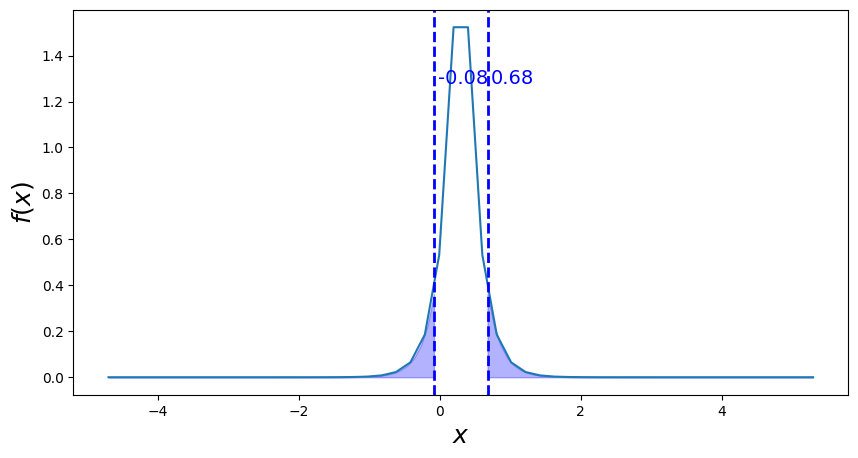

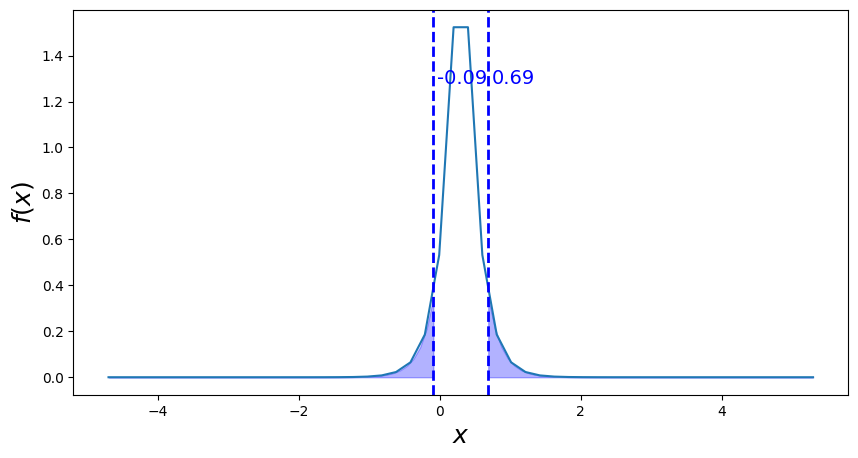

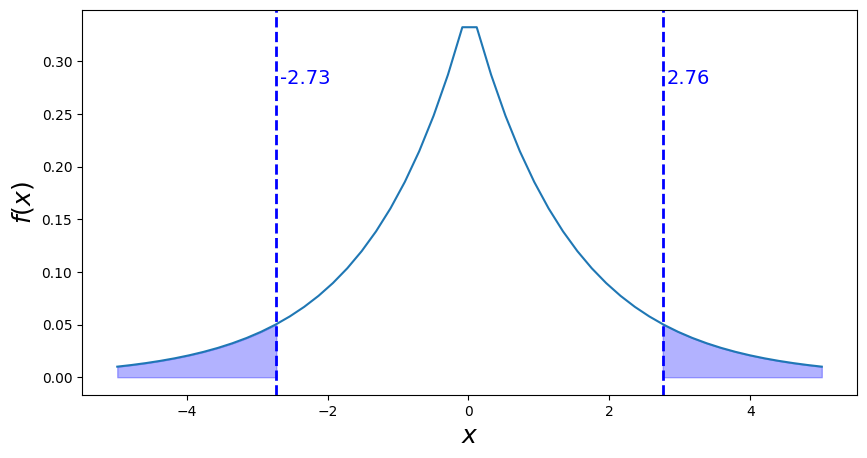

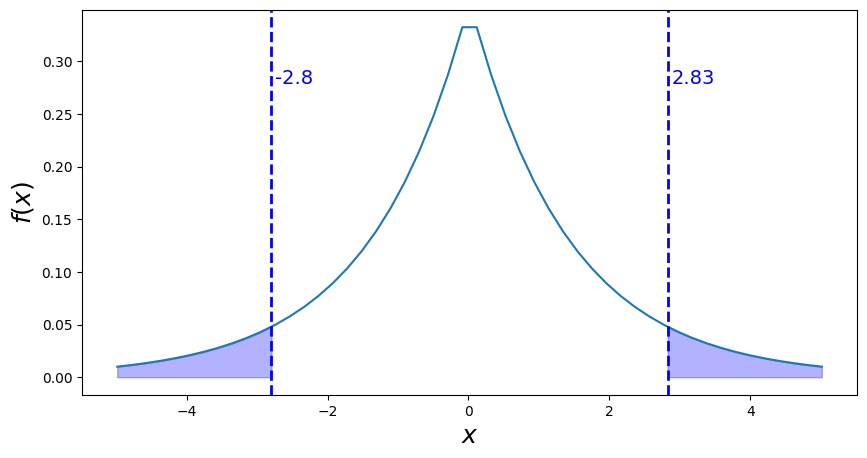

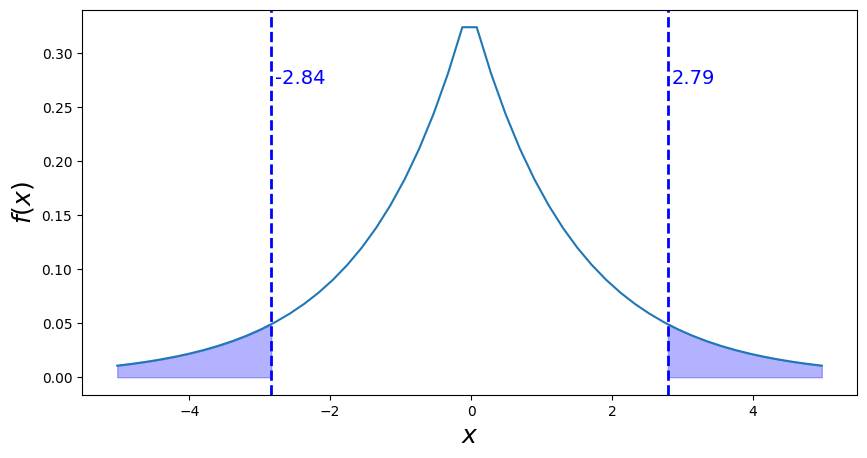

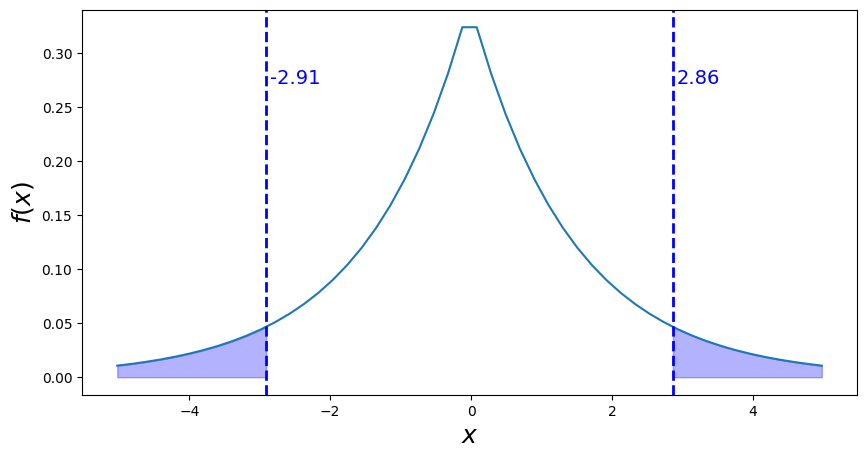

In [ ]:
a = []
b = []
for n in [3, 500, 10000]:
    sample_base = stats.laplace().rvs(size=n, random_state=0)
    a.append(laplace_norm_conf_int(0.05, sample_base.mean(), sample_base.std()))
    b.append(laplace_t_conf_int(0.05, sample_base.mean(), sample_base.std(),n))


In [ ]:
print('ДИ при n = [3, 500, 10000]')
print('-'*5)
for i in range(3):
    print(f'{i+1}.')
    print(f'Асимптотический ДИ:', a[i])
    print(f'Точный ДИ:', a[i])
    print('-'*5)

ДИ при n = [3, 500, 10000]
-----
1.
Асимптотический ДИ: (-0.08161412336512558, 0.6786720402005797)
Точный ДИ: (-0.08161412336512558, 0.6786720402005797)
-----
2.
Асимптотический ДИ: (-2.727682697958717, 2.757067901806991)
Точный ДИ: (-2.727682697958717, 2.757067901806991)
-----
3.
Асимптотический ДИ: (-2.8378514227844467, 2.7928875497673045)
Точный ДИ: (-2.8378514227844467, 2.7928875497673045)
-----


In [ ]:
# Задание 5

data = stats.laplace().rvs(size=1000)
def get_bootstrap_samples(data, n_samples):
  indices = np.random.randint(0, len(data), (n_samples, len(data)))
  samples = data[indices]
  return samples

In [ ]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(list(stat), [100 * alpha / 2., 100 * (1 - alpha / 2.)],axis=0)
    return boundaries

In [ ]:
np.random.seed(0)
median = map(np.median, get_bootstrap_samples(data, 1000))
mean = map(np.mean, get_bootstrap_samples(data, 1000))
var = map(np.var, get_bootstrap_samples(data, 1000))

In [ ]:
def efronov(size):
  a = 0.05
  data = stats.laplace().rvs(size=size)
  median = stat_intervals(map(np.median, get_bootstrap_samples(data, 1000)), a)
  mean =  stat_intervals(map(np.mean, get_bootstrap_samples(data, 1000)), a)
  var =  stat_intervals(map(np.var, get_bootstrap_samples(data, 1000)), a)

  print(median, mean, var, sep='\n')
  print('-'*50)

In [ ]:
for i in [3, 500, 10000]:
  efronov(i)


[-0.67163559  0.54627862]
[-0.67163559  0.54627862]
[0.         0.32962556]
--------------------------------------------------
[-0.0910171   0.08284016]
[-0.11643337  0.15422167]
[1.83400912 2.56134592]
--------------------------------------------------
[-0.02812705  0.00940698]
[-0.03570618  0.01801146]
[1.88303007 2.05769943]
--------------------------------------------------


Вывод: асимптотический и точный доверительные интервалы для среднего значения дают более узкие интервалы с увеличением размера выборки, чем эфронов доверительный интервал, который дает более точные результаты на маленьких выборках